<a href="https://colab.research.google.com/github/saleteyara/Preliminary-Analysis-of-the-Impact-of-R-D-Projects-on-the-Development-of-Computing-Students-Skills/blob/main/graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stacked Bar Chart

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.patches import Patch

In [ ]:
df = pd.read_csv('/content/sample_data/dados.csv', encoding='utf-8')
df = pd.DataFrame(df)
df.iloc[:,14]

,"Q2.12. Durante o projeto, você teve ou tem outra atividade remunerada?"
0,Não
1,Sim
2,Sim
3,Sim
4,Não
...,...
61,Não
62,Sim
63,Não
64,Sim


## Q4.3

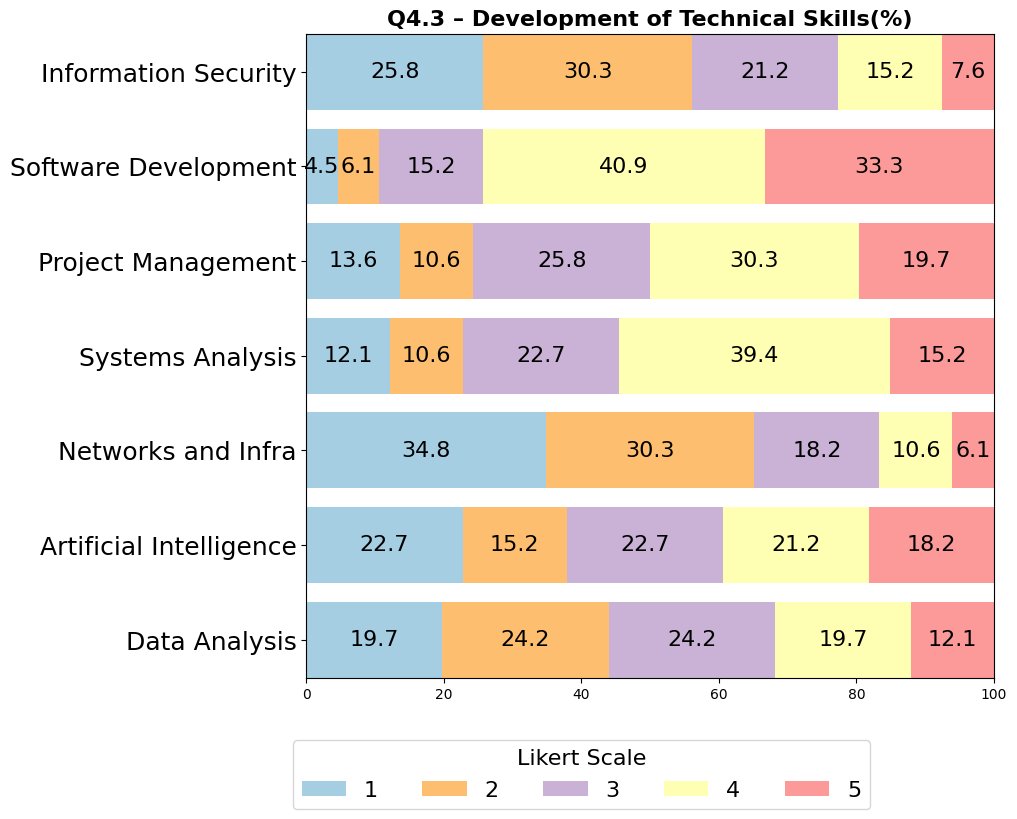

In [ ]:
# Escala Likert (1 a 5)
escala_likert = [1, 2, 3, 4, 5]
colors = ['#A6CEE3', '#FDBF6F', '#CAB2D6', '#FFFFB3', '#FB9A99']  # paleta padrão

# Extração das colunas
seguranca_info = df.iloc[:, 31]
desenvolvimento = df.iloc[:, 32]
gestao = df.iloc[:, 33]
analise = df.iloc[:, 34]
redes = df.iloc[:, 35]
ia = df.iloc[:, 36]
analisededados = df.iloc[:, 37]

# Lista de competências
competencias = [
    'Information Security',
    'Software Development',
    'Project Management',
    'Systems Analysis',
    'Networks and Infra',
    'Artificial Intelligence',
    'Data Analysis'
]

# Calcular porcentagem de cada resposta Likert
cols = [seguranca_info, desenvolvimento, gestao, analise, redes, ia, analisededados]
percent_data = []

for col in cols:
    counts = col.fillna(0).value_counts(normalize=True).reindex(escala_likert, fill_value=0) * 100
    percent_data.append(counts.values)

percent_data = np.array(percent_data)

# Criação do gráfico no formato padronizado
fig, ax = plt.subplots(figsize=(10, 8))
plt.margins(x=0, y=0)
plt.yticks(fontsize=18)

# Empilhamento horizontal
left = np.zeros(len(competencias))
for i, (label, color) in enumerate(zip(escala_likert, colors)):
    ax.barh(competencias, percent_data[:, i], left=left, color=color, label=f'{label}')

    # Adiciona rótulos percentuais dentro das barras
    for j in range(len(competencias)):
        if percent_data[j, i] > 3:  # só mostra se >3% para evitar poluição visual
            ax.text(left[j] + percent_data[j, i] / 2, j, f'{percent_data[j, i]:.1f}',
                    ha='center', va='center', color='black', fontsize=16)
    left += percent_data[:, i]

# Configurações do gráfico
ax.set_title('Q4.3 – Development of Technical Skills(%)', fontsize=16, fontweight='bold')
ax.set_xlim(0, 100)
ax.invert_yaxis()  # mantém o mesmo estilo do gráfico anterior
ax.legend(title='Likert Scale', title_fontsize=16, bbox_to_anchor=(0.4, -0.08), loc='upper center', ncol=5, fontsize=16)
plt.tight_layout(pad=0.1)
plt.show()

### Q4.3 Undergraduate and Graduate

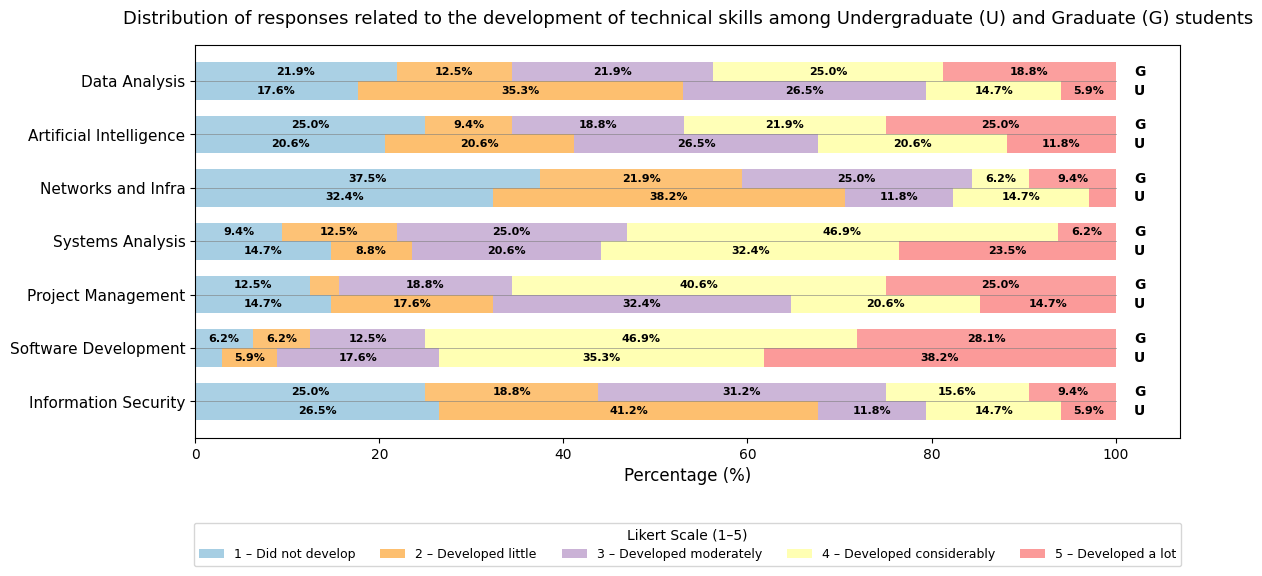

In [ ]:

# === Extração das colunas ===
seguranca_info = df.iloc[:, 31]
desenvolvimento = df.iloc[:, 32]
gestao = df.iloc[:, 33]
analise = df.iloc[:, 34]
redes = df.iloc[:, 35]
ia = df.iloc[:, 36]
analisededados = df.iloc[:, 37]

# === Lista de competências ===
competencias = [
    'Information Security',
    'Software Development',
    'Project Management',
    'Systems Analysis',
    'Networks and Infra',
    'Artificial Intelligence',
    'Data Analysis'
]

escala_likert = [1, 2, 3, 4, 5]

# === Separação de perfis ===
perfil_graduacao = df[df.iloc[:, 6].str.strip() == 'Graduação'].copy()
perfil_pos_graduacao = df[df.iloc[:, 6].str.strip() == 'Pós-graduação'].copy()

# --- Função auxiliar para gerar DataFrame percentual ---
def gerar_dataframe_percentual(perfil):
    colunas = [
        perfil.iloc[:, 31],
        perfil.iloc[:, 32],
        perfil.iloc[:, 33],
        perfil.iloc[:, 34],
        perfil.iloc[:, 35],
        perfil.iloc[:, 36],
        perfil.iloc[:, 37]
    ]
    contagens = [col.value_counts().reindex(range(1, 6), fill_value=0) for col in colunas]
    data = pd.DataFrame({competencias[i]: contagens[i] for i in range(len(competencias))}, index=escala_likert)
    return data.div(data.sum(axis=0), axis=1) * 100

# --- DataFrames ---
data_percent_gra = gerar_dataframe_percentual(perfil_graduacao)
data_percent_pos = gerar_dataframe_percentual(perfil_pos_graduacao)

# --- Conversão para listas ---
categories = competencias
undergrad = data_percent_gra.T.values.tolist()
postgrad = data_percent_pos.T.values.tolist()

# --- Cores e rótulos ---
colors_ug = ['#A6CEE3', '#FDBF6F', '#CAB2D6', '#FFFFB3', '#FB9A99']
colors_pg = ['#A6CEE3', '#FDBF6F', '#CAB2D6', '#FFFFB3', '#FB9A99']

likert_labels_en = [
    "1 – Did not develop",
    "2 – Developed little",
    "3 – Developed moderately",
    "4 – Developed considerably",
    "5 – Developed a lot"
]

# === Plotagem ===
y = np.arange(len(categories))
height = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(right=1)

# --- Undergraduate (U) ---
left = np.zeros(len(categories))
for i in range(5):
    values = np.array([u[i] for u in undergrad])
    bars = ax.barh(y - height/2, values, left=left, height=height, color=colors_ug[i])
    for j, bar in enumerate(bars):
        if values[j] > 3:
            ax.text(left[j] + values[j]/2, bar.get_y() + bar.get_height()/2,
                    f"{values[j]:.1f}%", ha='center', va='center',
                    color='black', fontsize=8, fontweight='bold')
    left += values
totals_undergrad = left.copy()

# --- Postgraduate (P) ---
left = np.zeros(len(categories))
for i in range(5):
    values = np.array([p[i] for p in postgrad])
    bars = ax.barh(y + height/2, values, left=left, height=height, color=colors_pg[i], alpha=0.95)
    for j, bar in enumerate(bars):
        if values[j] > 5:
            ax.text(left[j] + values[j]/2, bar.get_y() + bar.get_height()/2,
                    f"{values[j]:.1f}%", ha='center', va='center',
                    color='black', fontsize=8, fontweight='bold')
    left += values
totals_postgrad = left.copy()

# --- Linha fina entre U e P ---
for i, cat_y in enumerate(y):
    ax.plot([0, 100], [cat_y, cat_y], color='gray', linewidth=0.6, alpha=0.7, linestyle='-')

# --- Limites e marcadores U/P ---
max_total = max(totals_undergrad.max(), totals_postgrad.max())
ax.set_xlim(0, max_total + 7)

offset = max(1.0, max_total * 0.02)
for idx in range(len(categories)):
    ax.text(totals_undergrad[idx] + offset, y[idx] - height/2,
            "U", va='center', ha='left', fontsize=10, fontweight='bold')
    ax.text(totals_postgrad[idx] + offset, y[idx] + height/2,
            "G", va='center', ha='left', fontsize=10, fontweight='bold')

# --- Rótulos e título ---
ax.set_yticks(y)
ax.set_yticklabels(categories, fontsize=11)
ax.set_xlabel("Percentage (%)", fontsize=12)
ax.set_title("Distribution of responses related to the development of technical skills among Undergraduate (U) and Graduate (G) students",
             fontsize=13, pad=15)

# --- Legenda ---
patches = [Patch(facecolor=colors_ug[i]) for i in range(5)]
ax.legend(
    handles=patches,
    labels=likert_labels_en,
    title="Likert Scale (1–5)",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.20),
    ncol=5,
    fontsize=9,
    title_fontsize=10,
    frameon=True
)

plt.tight_layout()
plt.show()


## Q4.5

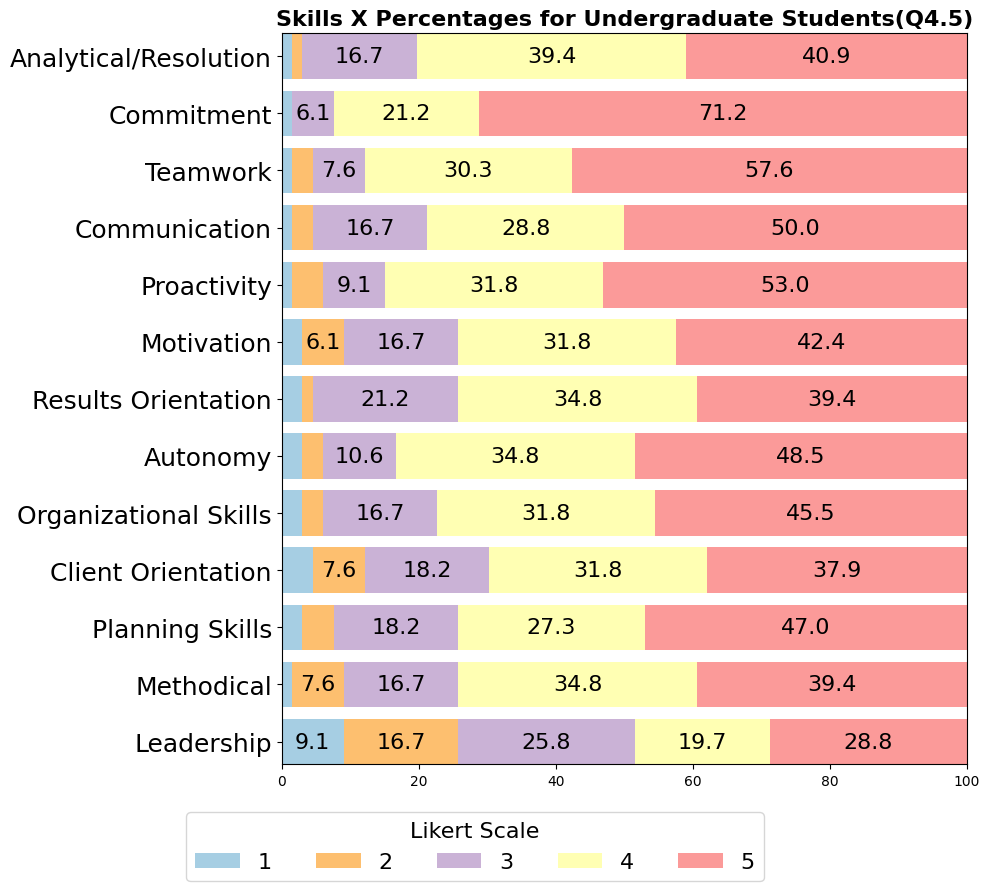

In [ ]:

competencias = [
    'Analytical/Resolution',
    'Commitment',
    'Teamwork',
    'Communication',
    'Proactivity',
    'Motivation',
    'Results Orientation',
    'Autonomy',
    'Organizational Skills',
    'Client Orientation',
    'Planning Skills',
    'Methodical',
    'Leadership'
]

cols = df.iloc[:,44:57]

# Escala Likert (1 a 5)
escala_likert = [1, 2, 3, 4, 5]
colors = ['#A6CEE3', '#FDBF6F', '#CAB2D6', '#FFFFB3', '#FB9A99']  # Paleta inspirada no gráfico de exemplo

# Calcula a porcentagem de cada resposta
percent_data = []
for i in range(cols.shape[1]):
    counts = cols.iloc[:, i].value_counts(normalize=True).reindex(escala_likert, fill_value=0) * 100
    percent_data.append(counts.values)

percent_data = np.array(percent_data)

# Criação do gráfico
fig, ax = plt.subplots(figsize=(10, 9))
plt.yticks(fontsize=18)
plt.margins(x=0, y=0)

# Empilhamento horizontal
left = np.zeros(len(competencias))
for i, (label, color) in enumerate(zip(escala_likert, colors)):
    ax.barh(competencias, percent_data[:, i], left=left, color=color, label=f'{label}')
    # Add percentage labels inside the bars
    for j in range(len(competencias)):
        if percent_data[j, i] > 5:  # only show if >3% to avoid clutter
            ax.text(left[j] + percent_data[j, i]/2, j, f'{percent_data[j, i]:.1f}',
                    ha='center', va='center', color='black', fontsize=16)
    left += percent_data[:, i]

# Graph settings
ax.set_title('Skills X Percentages for Undergraduate Students(Q4.5)', fontsize=16, fontweight='bold')
ax.legend(title='Likert Scale', title_fontsize=16, bbox_to_anchor=(0.72, -0.05), loc='best', ncol=5,fontsize=16)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

### Q4.5 - With Experience

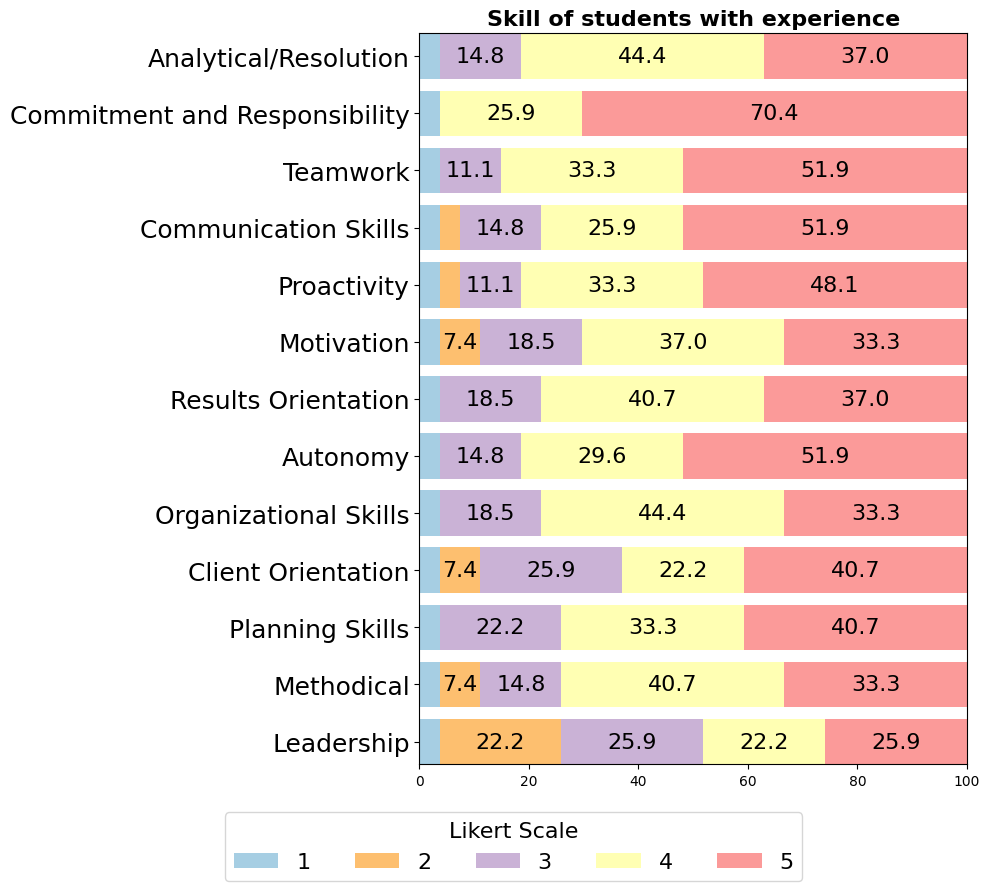

In [ ]:
perfil_exp = df[df.iloc[:, 14].str.strip() == 'Sim'].copy()

competencias = [
    'Analytical/Resolution',
    'Commitment and Responsibility',
    'Teamwork',
    'Communication Skills',
    'Proactivity',
    'Motivation',
    'Results Orientation',
    'Autonomy',
    'Organizational Skills',
    'Client Orientation',
    'Planning Skills',
    'Methodical',
    'Leadership'
]

cols = perfil_exp.iloc[:,44:57]

# Escala Likert (1 a 5)
escala_likert = [1, 2, 3, 4, 5]
colors = ['#A6CEE3', '#FDBF6F', '#CAB2D6', '#FFFFB3', '#FB9A99']  # Paleta inspirada no gráfico de exemplo

# Calcula a porcentagem de cada resposta
percent_data = []
for i in range(cols.shape[1]):
    counts = cols.iloc[:, i].value_counts(normalize=True).reindex(escala_likert, fill_value=0) * 100
    percent_data.append(counts.values)

percent_data = np.array(percent_data)

# Criação do gráfico
fig, ax = plt.subplots(figsize=(10, 9))
plt.yticks(fontsize=18)
plt.margins(x=0, y=0)

# Empilhamento horizontal
left = np.zeros(len(competencias))
for i, (label, color) in enumerate(zip(escala_likert, colors)):
    ax.barh(competencias, percent_data[:, i], left=left, color=color, label=f'{label}')
    # Add percentage labels inside the bars
    for j in range(len(competencias)):
        if percent_data[j, i] > 5:  # only show if >3% to avoid clutter
            ax.text(left[j] + percent_data[j, i]/2, j, f'{percent_data[j, i]:.1f}',
                    ha='center', va='center', color='black', fontsize=16)
    left += percent_data[:, i]

# Graph settings
ax.set_title('Skill of students with experience', fontsize=16, fontweight='bold')
ax.legend(title='Likert Scale', title_fontsize=16, bbox_to_anchor=(0.72, -0.05), loc='best', ncol=5,fontsize=16)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

### Q4.5 Without Experience

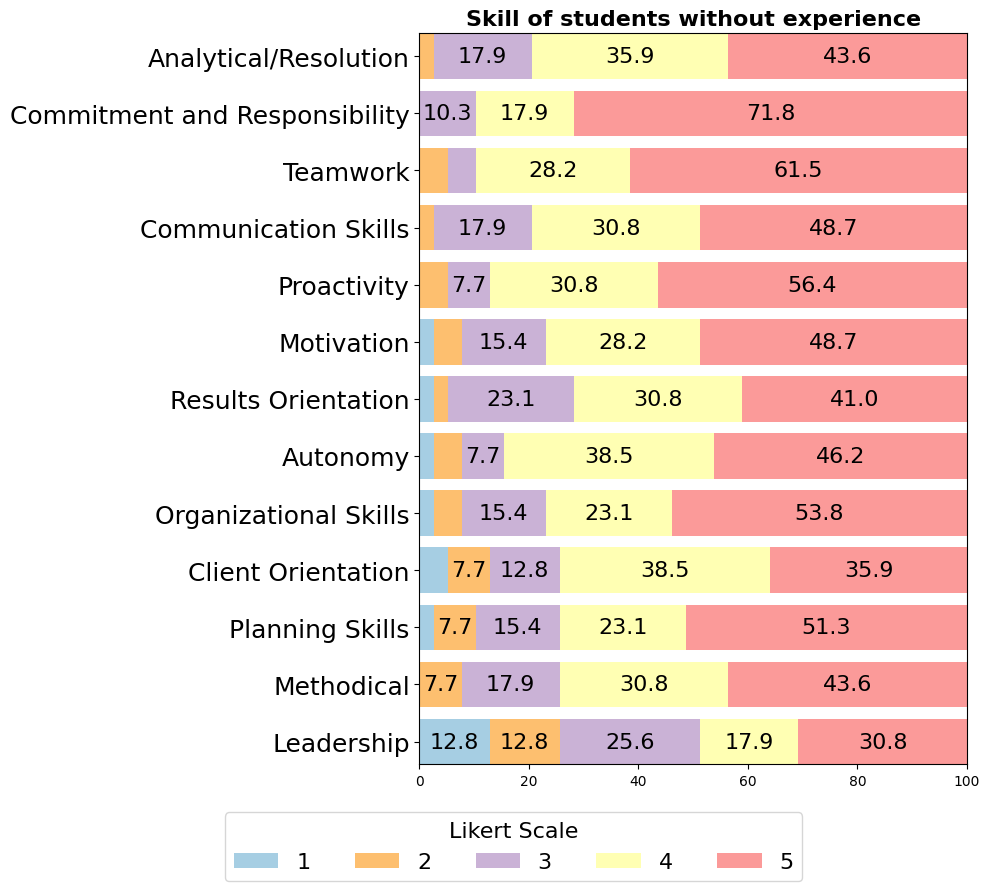

In [ ]:
perfil_without_exp = df[df.iloc[:, 14].str.strip() == 'Não'].copy()

competencias = [
    'Analytical/Resolution',
    'Commitment and Responsibility',
    'Teamwork',
    'Communication Skills',
    'Proactivity',
    'Motivation',
    'Results Orientation',
    'Autonomy',
    'Organizational Skills',
    'Client Orientation',
    'Planning Skills',
    'Methodical',
    'Leadership'
]

cols = perfil_without_exp.iloc[:,44:57]

# Escala Likert (1 a 5)
escala_likert = [1, 2, 3, 4, 5]
colors = ['#A6CEE3', '#FDBF6F', '#CAB2D6', '#FFFFB3', '#FB9A99']  # Paleta inspirada no gráfico de exemplo

# Calcula a porcentagem de cada resposta
percent_data = []
for i in range(cols.shape[1]):
    counts = cols.iloc[:, i].value_counts(normalize=True).reindex(escala_likert, fill_value=0) * 100
    percent_data.append(counts.values)

percent_data = np.array(percent_data)

# Criação do gráfico
fig, ax = plt.subplots(figsize=(10, 9))
plt.yticks(fontsize=18)
plt.margins(x=0, y=0)

# Empilhamento horizontal
left = np.zeros(len(competencias))
for i, (label, color) in enumerate(zip(escala_likert, colors)):
    ax.barh(competencias, percent_data[:, i], left=left, color=color, label=f'{label}')
    # Add percentage labels inside the bars
    for j in range(len(competencias)):
        if percent_data[j, i] > 6:  # only show if >3% to avoid clutter
            ax.text(left[j] + percent_data[j, i]/2, j, f'{percent_data[j, i]:.1f}',
                    ha='center', va='center', color='black', fontsize=16)
    left += percent_data[:, i]

# Graph settings
ax.set_title('Skill of students without experience', fontsize=16, fontweight='bold')
ax.legend(title='Likert Scale', title_fontsize=16, bbox_to_anchor=(0.72, -0.05), loc='best', ncol=5,fontsize=16)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

### Q4.5 - With Experience and Without Experience

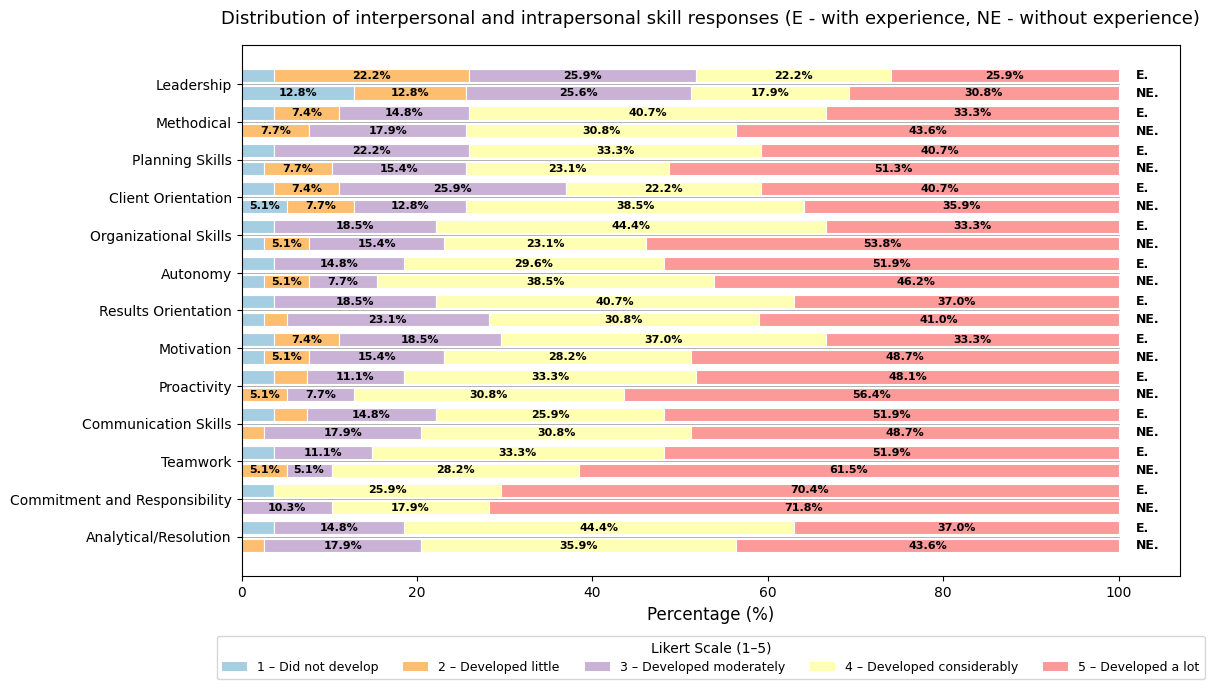

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# Escala Likert
escala_likert = [1, 2, 3, 4, 5]

# === Sem experiência ===
perfil_without_exp = df[df.iloc[:, 14].str.strip() == 'Não'].copy()

indices_competencias = range(44, 57)  # Ajuste conforme a posição real das colunas das competências
competencias = [
    'Analytical/Resolution',
    'Commitment and Responsibility',
    'Teamwork',
    'Communication Skills',
    'Proactivity',
    'Motivation',
    'Results Orientation',
    'Autonomy',
    'Organizational Skills',
    'Client Orientation',
    'Planning Skills',
    'Methodical',
    'Leadership'
]

data_no = pd.DataFrame({comp: perfil_without_exp.iloc[:, col].value_counts().reindex(range(1, 6), fill_value=0)
                        for comp, col in zip(competencias, indices_competencias)}, index=escala_likert)
data_percent_no = data_no.div(data_no.sum(axis=0), axis=1) * 100

# === Com experiência ===
perfil_exp = df[df.iloc[:, 14].str.strip() == 'Sim'].copy()
data_yes = pd.DataFrame({comp: perfil_exp.iloc[:, col].value_counts().reindex(range(1, 6), fill_value=0)
                         for comp, col in zip(competencias, indices_competencias)}, index=escala_likert)
data_percent_yes = data_yes.div(data_yes.sum(axis=0), axis=1) * 100

# --- Dados ---
categories = data_no.columns.tolist()
without_exp = data_percent_no.T.values.tolist()
with_exp = data_percent_yes.T.values.tolist()

# --- Cores e legendas ---
colors_no = ['#A6CEE3', '#FDBF6F', '#CAB2D6', '#FFFFB3', '#FB9A99']
colors_yes = ['#A6CEE3', '#FDBF6F', '#CAB2D6', '#FFFFB3', '#FB9A99']

likert_labels_en = [
    "1 – Did not develop",
    "2 – Developed little",
    "3 – Developed moderately",
    "4 – Developed considerably",
    "5 – Developed a lot"
]

# --- Configuração do gráfico ---
y = np.arange(len(categories))
height = 0.35
spacing = 0.12  # espaçamento entre grupos

fig, ax = plt.subplots(figsize=(12, 7))

fig.subplots_adjust(right=1)

# --- Sem experiência (No) ---
left = np.zeros(len(categories))
for i in range(5):
    values = np.array([u[i] for u in without_exp])
    bars = ax.barh(y - height/2 - spacing/2, values, left=left, height=height,
                   color=colors_no[i], edgecolor='white', linewidth=0.8)
    for j, bar in enumerate(bars):
        if values[j] > 3:
            ax.text(left[j] + values[j]/2, bar.get_y() + bar.get_height()/2,
                    f"{values[j]:.1f}%", ha='center', va='center',
                    color='black', fontsize=8, fontweight='bold')
    left += values
totals_no = left.copy()

# --- Com experiência (Yes) ---
left = np.zeros(len(categories))
for i in range(5):
    values = np.array([p[i] for p in with_exp])
    bars = ax.barh(y + height/2 + spacing/2, values, left=left, height=height,
                   color=colors_yes[i], edgecolor='white', linewidth=0.8)
    for j, bar in enumerate(bars):
        if values[j] > 5:
            ax.text(left[j] + values[j]/2, bar.get_y() + bar.get_height()/2,
                    f"{values[j]:.1f}%", ha='center', va='center',
                    color='black', fontsize=8, fontweight='bold')
    left += values
totals_yes = left.copy()

# --- Linha fina separando pares ---
for i, cat_y in enumerate(y):
    ax.plot([0, 100], [cat_y, cat_y], color='gray', linewidth=0.6, alpha=0.7)

# --- Limites e marcadores ---
max_total = max(totals_no.max(), totals_yes.max())
ax.set_xlim(0, max_total + 7)

offset = max(1.0, max_total * 0.02)
for idx in range(len(categories)):
    ax.text(totals_no[idx] + offset, y[idx] - height/2 - spacing/2,
            "NE.", va='center', ha='left', fontsize=9, fontweight='bold')
    ax.text(totals_yes[idx] + offset, y[idx] + height/2 + spacing/2,
            "E.", va='center', ha='left', fontsize=9, fontweight='bold')

# --- Eixos e título ---
ax.set_yticks(y)
ax.set_yticklabels(categories, fontsize=10)
ax.set_xlabel("Percentage (%)", fontsize=12)
ax.set_title("Distribution of interpersonal and intrapersonal skill responses (E - with experience, NE - without experience)",
             fontsize=13, pad=15)

# --- Legenda ---
patches = [Patch(facecolor=colors_no[i]) for i in range(5)]
ax.legend(
    handles=patches,
    labels=likert_labels_en,
    title="Likert Scale (1–5)",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.10),
    ncol=5,
    fontsize=9,
    title_fontsize=10,
    frameon=True
)


plt.tight_layout()
plt.show()


### Q4.5 - Undergraduated

> Adicionar blockquote





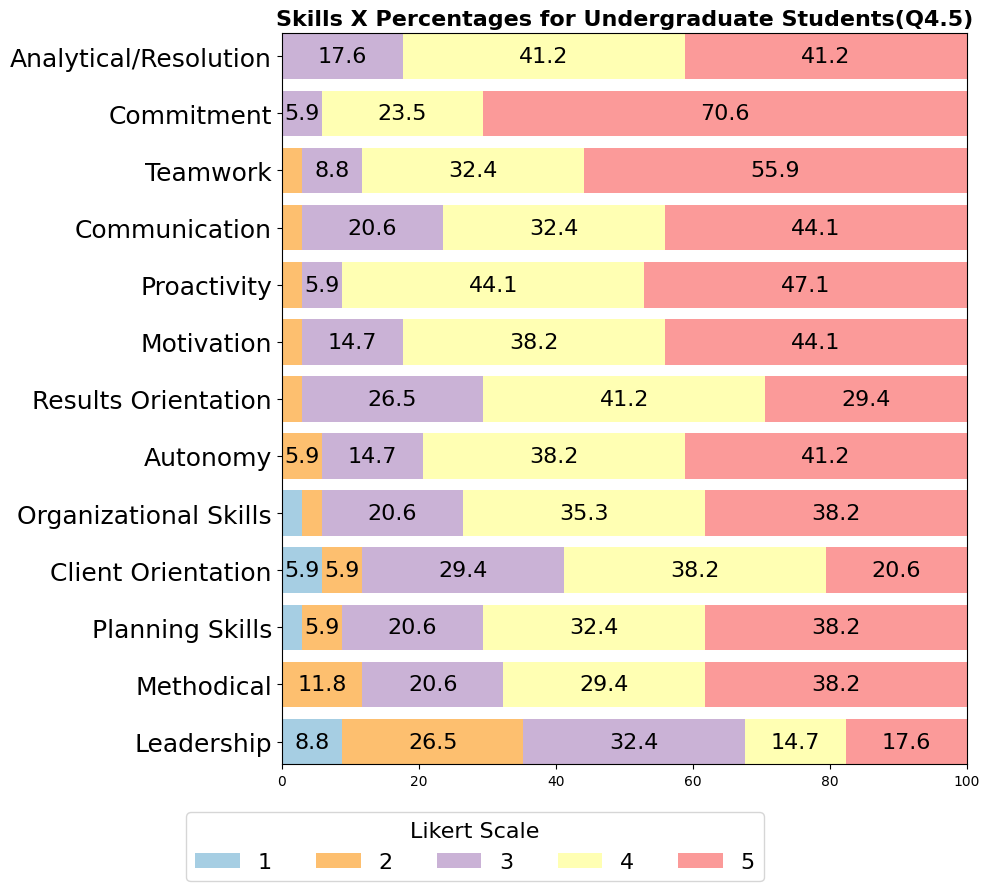

In [ ]:
perfil_graduacao = df[df.iloc[:, 6].str.strip() == 'Graduação'].copy()

competencias = [
    'Analytical/Resolution',
    'Commitment',
    'Teamwork',
    'Communication',
    'Proactivity',
    'Motivation',
    'Results Orientation',
    'Autonomy',
    'Organizational Skills',
    'Client Orientation',
    'Planning Skills',
    'Methodical',
    'Leadership'
]

cols = perfil_graduacao.iloc[:,44:57]

# Escala Likert (1 a 5)
escala_likert = [1, 2, 3, 4, 5]
colors = ['#A6CEE3', '#FDBF6F', '#CAB2D6'a, '#FFFFB3', '#FB9A99']  # Paleta inspirada no gráfico de exemplo

# Calcula a porcentagem de cada resposta
percent_data = []
for i in range(cols.shape[1]):
    counts = cols.iloc[:, i].value_counts(normalize=True).reindex(escala_likert, fill_value=0) * 100
    percent_data.append(counts.values)

percent_data = np.array(percent_data)

# Criação do gráfico
fig, ax = plt.subplots(figsize=(10, 9))
plt.yticks(fontsize=18)
plt.margins(x=0, y=0)

# Empilhamento horizontal
left = np.zeros(len(competencias))
for i, (label, color) in enumerate(zip(escala_likert, colors)):
    ax.barh(competencias, percent_data[:, i], left=left, color=color, label=f'{label}')
    # Add percentage labels inside the bars
    for j in range(len(competencias)):
        if percent_data[j, i] > 5:  # only show if >3% to avoid clutter
            ax.text(left[j] + percent_data[j, i]/2, j, f'{percent_data[j, i]:.1f}',
                    ha='center', va='center', color='black', fontsize=16)
    left += percent_data[:, i]

# Graph settings
ax.set_title('Skills X Percentages for Undergraduate Students(Q4.5)', fontsize=16, fontweight='bold')
ax.legend(title='Likert Scale', title_fontsize=16, bbox_to_anchor=(0.72, -0.05), loc='best', ncol=5,fontsize=16)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

### Q4.5 - **Graduated**

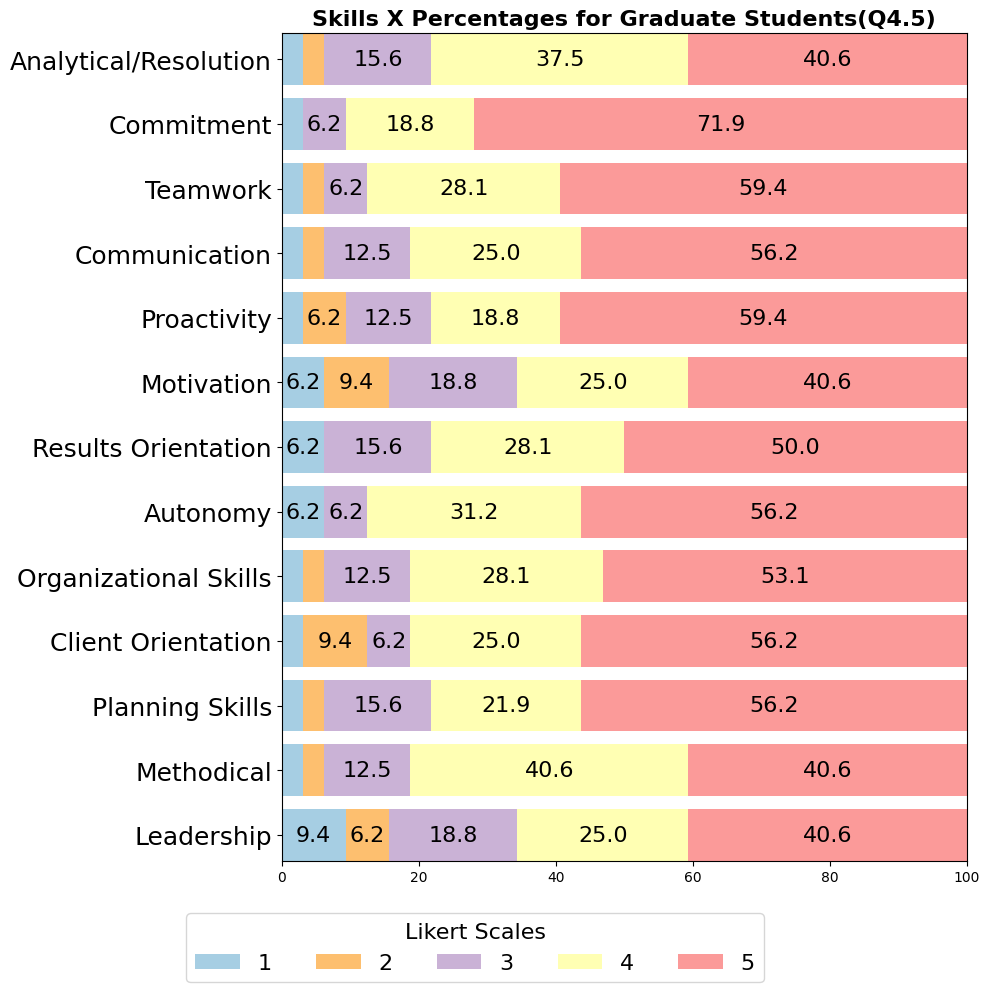

In [ ]:
perfil_pos_graduacao = df[df.iloc[:, 6].str.strip() == 'Pós-graduação'].copy()

competencias = [
    'Analytical/Resolution',
    'Commitment',
    'Teamwork',
    'Communication',
    'Proactivity',
    'Motivation',
    'Results Orientation',
    'Autonomy',
    'Organizational Skills',
    'Client Orientation',
    'Planning Skills',
    'Methodical',
    'Leadership'
]

cols = perfil_pos_graduacao.iloc[:,44:57]

# Escala Likert (1 a 5)
escala_likert = [1, 2, 3, 4, 5]
colors = ['#A6CEE3', '#FDBF6F', '#CAB2D6', '#FFFFB3', '#FB9A99']  # Paleta inspirada no gráfico de exemplo

# Calcula a porcentagem de cada resposta
percent_data = []
for i in range(cols.shape[1]):
    counts = cols.iloc[:, i].value_counts(normalize=True).reindex(escala_likert, fill_value=0) * 100
    percent_data.append(counts.values)

percent_data = np.array(percent_data)

# Criação do gráfico
fig, ax = plt.subplots(figsize=(10, 10))
plt.yticks(fontsize=18)
plt.margins(x=0, y=0)

# Empilhamento horizontal
left = np.zeros(len(competencias))
for i, (label, color) in enumerate(zip(escala_likert, colors)):
    ax.barh(competencias, percent_data[:, i], left=left, color=color, label=f'{label}')
    # Add percentage labels inside the bars
    for j in range(len(competencias)):
        if percent_data[j, i] > 6:  # only show if >3% to avoid clutter
            ax.text(left[j] + percent_data[j, i]/2, j, f'{percent_data[j, i]:.1f}',
                    ha='center', va='center', color='black', fontsize=16)
    left += percent_data[:, i]

# Graph settings
ax.set_title('Skills X Percentages for Graduate Students(Q4.5)', fontsize=16, fontweight='bold')
ax.legend(title="Likert Scales", title_fontsize=16, bbox_to_anchor=(0.72, -0.05), loc='best', ncol=5,fontsize=16)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

### Q4.5 - Undergraduate and graduate

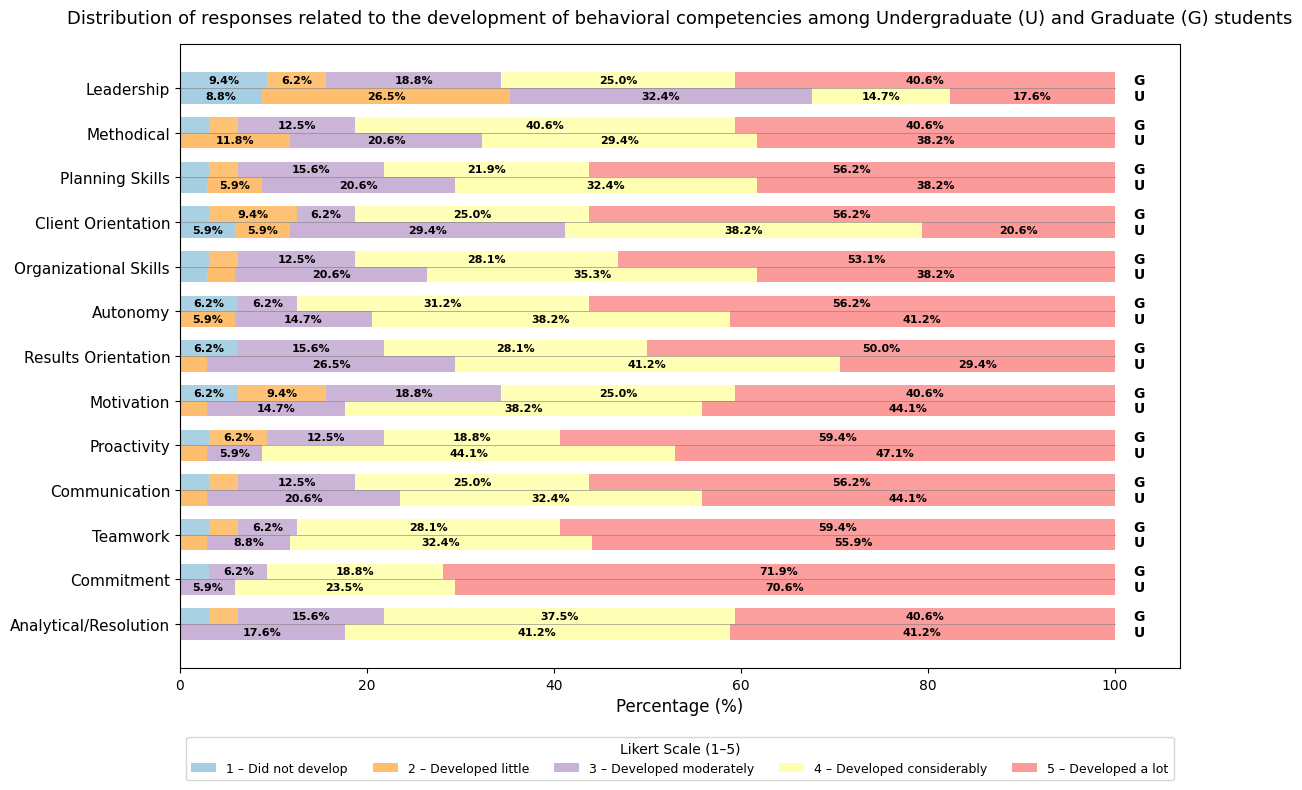

In [ ]:


# === Lista de competências ===
competencias = [
    'Analytical/Resolution',
    'Commitment',
    'Teamwork',
    'Communication',
    'Proactivity',
    'Motivation',
    'Results Orientation',
    'Autonomy',
    'Organizational Skills',
    'Client Orientation',
    'Planning Skills',
    'Methodical',
    'Leadership'
]

escala_likert = [1, 2, 3, 4, 5]

# === Separação de perfis ===
perfil_graduacao = df[df.iloc[:, 6].str.strip() == 'Graduação'].copy()
perfil_pos_graduacao = df[df.iloc[:, 6].str.strip() == 'Pós-graduação'].copy()

# === Função auxiliar para gerar DataFrame percentual ===
def gerar_dataframe_percentual(perfil):
    colunas = [perfil.iloc[:, i] for i in range(44, 57)]  # colunas 44–56 inclusivas
    contagens = [col.value_counts().reindex(range(1, 6), fill_value=0) for col in colunas]
    data = pd.DataFrame({competencias[i]: contagens[i] for i in range(len(competencias))}, index=escala_likert)
    return data.div(data.sum(axis=0), axis=1) * 100

# === DataFrames percentuais ===
data_percent_gra = gerar_dataframe_percentual(perfil_graduacao)
data_percent_pos = gerar_dataframe_percentual(perfil_pos_graduacao)

# === Conversão para listas ===
categories = competencias
undergrad = data_percent_gra.T.values.tolist()
postgrad = data_percent_pos.T.values.tolist()

# === Cores e rótulos ===
colors_ug = ['#A6CEE3', '#FDBF6F', '#CAB2D6', '#FFFFB3', '#FB9A99']
colors_pg = colors_ug  # mesma paleta

likert_labels_en = [
    "1 – Did not develop",
    "2 – Developed little",
    "3 – Developed moderately",
    "4 – Developed considerably",
    "5 – Developed a lot"
]

# === Plotagem ===
y = np.arange(len(categories))
height = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(right=1)

# --- Undergraduate (U) ---
left = np.zeros(len(categories))
for i in range(5):
    values = np.array([u[i] for u in undergrad])
    bars = ax.barh(y - height/2, values, left=left, height=height, color=colors_ug[i])
    for j, bar in enumerate(bars):
        if values[j] > 3:
            ax.text(left[j] + values[j]/2, bar.get_y() + bar.get_height()/2,
                    f"{values[j]:.1f}%", ha='center', va='center',
                    color='black', fontsize=8, fontweight='bold')
    left += values
totals_undergrad = left.copy()

# --- Postgraduate (P) ---
left = np.zeros(len(categories))
for i in range(5):
    values = np.array([p[i] for p in postgrad])
    bars = ax.barh(y + height/2, values, left=left, height=height, color=colors_pg[i], alpha=0.95)
    for j, bar in enumerate(bars):
        if values[j] > 5:
            ax.text(left[j] + values[j]/2, bar.get_y() + bar.get_height()/2,
                    f"{values[j]:.1f}%", ha='center', va='center',
                    color='black', fontsize=8, fontweight='bold')
    left += values
totals_postgrad = left.copy()

# --- Linha fina entre U e P ---
for i, cat_y in enumerate(y):
    ax.plot([0, 100], [cat_y, cat_y], color='gray', linewidth=0.6, alpha=0.7, linestyle='-')

# --- Limites e marcadores U/P ---
max_total = max(totals_undergrad.max(), totals_postgrad.max())
ax.set_xlim(0, max_total + 7)

offset = max(1.0, max_total * 0.02)
for idx in range(len(categories)):
    ax.text(totals_undergrad[idx] + offset, y[idx] - height/2,
            "U", va='center', ha='left', fontsize=10, fontweight='bold')
    ax.text(totals_postgrad[idx] + offset, y[idx] + height/2,
            "G", va='center', ha='left', fontsize=10, fontweight='bold')

# --- Rótulos e título ---
ax.set_yticks(y)
ax.set_yticklabels(categories, fontsize=11)
ax.set_xlabel("Percentage (%)", fontsize=12)
ax.set_title(
    "Distribution of responses related to the development of behavioral competencies among Undergraduate (U) and Graduate (G) students",
    fontsize=13, pad=15
)

# --- Legenda ---
patches = [Patch(facecolor=colors_ug[i]) for i in range(5)]
ax.legend(
    handles=patches,
    labels=likert_labels_en,
    title="Likert Scale (1–5)",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.10),
    ncol=5,
    fontsize=9,
    title_fontsize=10,
    frameon=True
)

plt.tight_layout()
plt.show()


### Q4.5

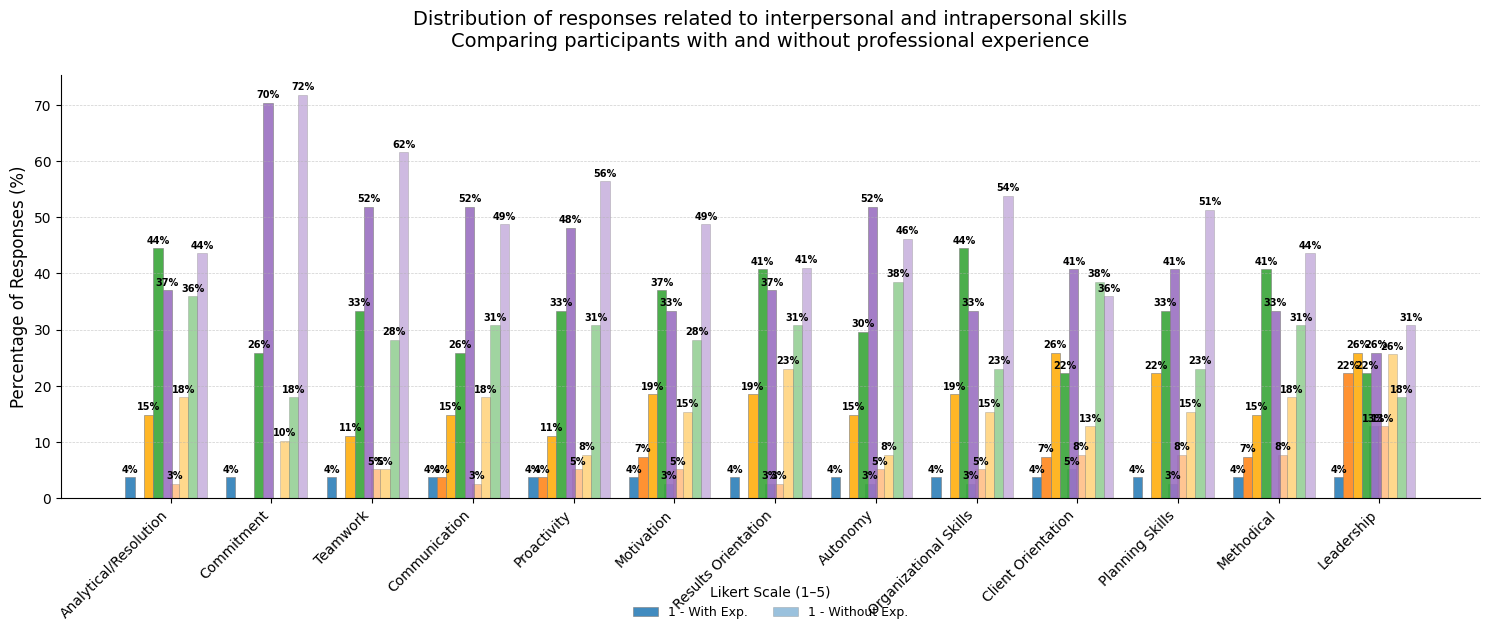

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -----------------------------------------------------------
# 1. Seleção dos dados reais
# -----------------------------------------------------------

df_experiencia = df.loc[df['Q2.12. Durante o projeto, você teve ou tem outra atividade remunerada?'] == "Sim"]
df_semexperiencia = df.loc[df['Q2.12. Durante o projeto, você teve ou tem outra atividade remunerada?'] == "Não"]

competencias = [
    'Analytical/Resolution',
    'Commitment',
    'Teamwork',
    'Communication',
    'Proactivity',
    'Motivation',
    'Results Orientation',
    'Autonomy',
    'Organizational Skills',
    'Client Orientation',
    'Planning Skills',
    'Methodical',
    'Leadership'
]

cols = df.columns[44:57]  # colunas Likert (1 a 5)

# -----------------------------------------------------------
# 2. Função auxiliar para calcular porcentagens Likert
# -----------------------------------------------------------

def calcular_porcentagens_likert(df_subset, cols, niveis_likert):
    data = []
    for col in cols:
        contagens = df_subset[col].value_counts().reindex(niveis_likert, fill_value=0)
        porcentagens = (contagens / contagens.sum()) * 100
        data.append(porcentagens.values)
    return pd.DataFrame(data, columns=niveis_likert, index=competencias)

# -----------------------------------------------------------
# 3. Cálculo de porcentagens
# -----------------------------------------------------------

niveis_likert = [1, 2, 3, 4, 5]
cores = ['#1f77b4', '#ff7f0e', '#ffaa00', '#2ca02c', '#9467bd']

df_exp_pct = calcular_porcentagens_likert(df_experiencia, cols, niveis_likert)
df_noexp_pct = calcular_porcentagens_likert(df_semexperiencia, cols, niveis_likert)

# -----------------------------------------------------------
# 4. Plotagem
# -----------------------------------------------------------

fig, ax = plt.subplots(figsize=(15, 7))

# === Mantém largura das colunas, mas aumenta espaçamento ===
x = np.arange(len(competencias)) * 1.3  # espaçamento extra entre grupos
width_total = 0.9
bar_width = width_total / (len(niveis_likert) * 1.5)
offset_exp = -width_total / 4
offset_noexp = width_total / 4

# --- Plotagem das barras ---
for i, nivel in enumerate(niveis_likert):
    pos_exp = x + (i - len(niveis_likert)/2) * bar_width + offset_exp
    pos_noexp = x + (i - len(niveis_likert)/2) * bar_width + offset_noexp

    bars_exp = ax.bar(
        pos_exp,
        df_exp_pct[nivel],
        width=bar_width,
        color=cores[i],
        alpha=0.85,
        edgecolor='gray',
        linewidth=0.5,
        label=f'{nivel} - With Exp.' if i == 0 else ""
    )

    bars_noexp = ax.bar(
        pos_noexp,
        df_noexp_pct[nivel],
        width=bar_width,
        color=cores[i],
        alpha=0.45,
        edgecolor='gray',
        linewidth=0.5,
        label=f'{nivel} - Without Exp.' if i == 0 else ""
    )

    # --- Adiciona o valor percentual acima de cada barra ---
    for bar in bars_exp:
        height = bar.get_height()
        if height > 1:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.5,
                f'{height:.0f}%',
                ha='center',
                va='bottom',
                fontsize=7,
                color='black',
                fontweight='bold'
            )
    for bar in bars_noexp:
        height = bar.get_height()
        if height > 1:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.5,
                f'{height:.0f}%',
                ha='center',
                va='bottom',
                fontsize=7,
                color='black',
                fontweight='bold'
            )

# -----------------------------------------------------------
# 5. Personalização visual
# -----------------------------------------------------------

ax.set_xticks(x)
ax.set_xticklabels(competencias, rotation=45, ha='right', fontsize=10)

ax.set_ylabel('Percentage of Responses (%)', fontsize=12)
ax.set_title(
    'Distribution of responses related to interpersonal and intrapersonal skills\n'
    'Comparing participants with and without professional experience',
    fontsize=14,
    pad=20
)

ax.grid(axis='y', linestyle='--', alpha=0.6, linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# -----------------------------------------------------------
# 6. Legenda (embaixo do gráfico)
# -----------------------------------------------------------

handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l != ""]
ax.legend(
    *zip(*unique),
    loc='upper center',
    bbox_to_anchor=(0.5, -0.18),
    ncol=5,
    frameon=False,
    fontsize=9,
    title="Likert Scale (1–5)"
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


## Q4.8

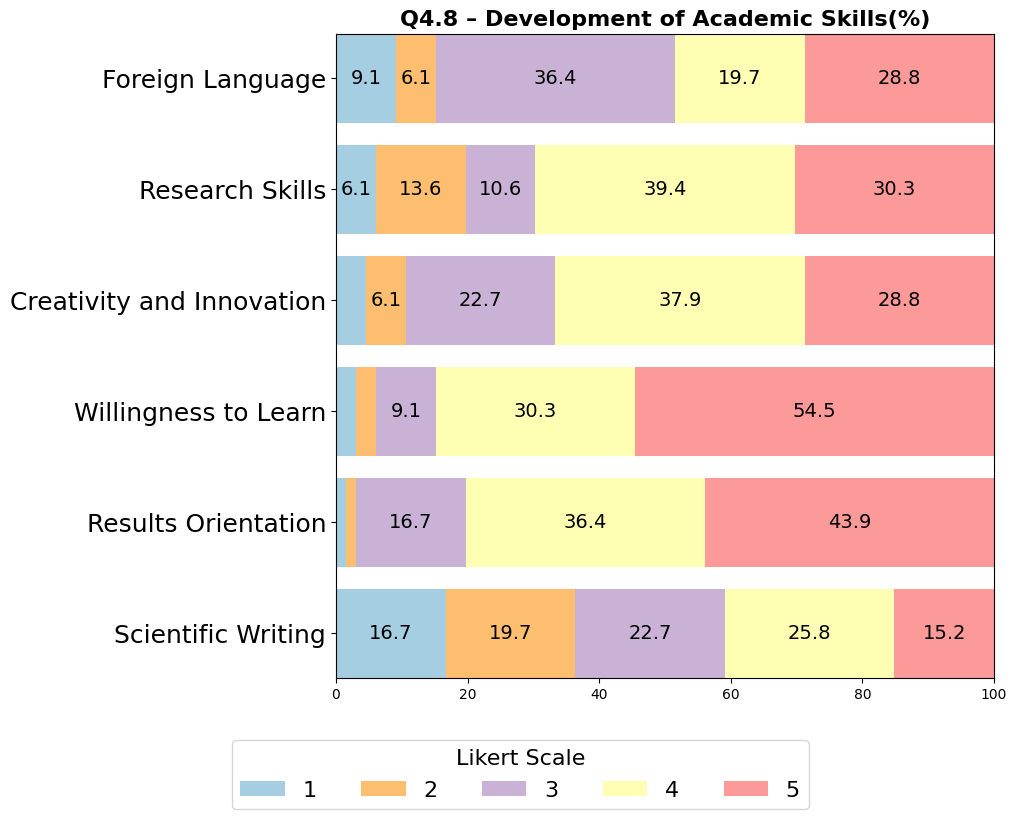

In [ ]:
escala_likert = [1, 2, 3, 4, 5]
colors = ['#A6CEE3', '#FDBF6F', '#CAB2D6', '#FFFFB3', '#FB9A99']  # paleta padrão

# Extração das colunas
lingua_estrangeira = df.iloc[:, 76]
habilidade_pesquisa = df.iloc[:, 77]
criatividade_inovacao = df.iloc[:, 78]
vontade_aprender = df.iloc[:, 79]
orientacao_resultado = df.iloc[:, 80]
escrita_cientifica = df.iloc[:, 81]

# Lista de competências
competencias = [
    'Foreign Language',
    'Research Skills',
    'Creativity and Innovation',
    'Willingness to Learn',
    'Results Orientation',
    'Scientific Writing'
]

# Calcular porcentagens de respostas Likert
cols = [lingua_estrangeira, habilidade_pesquisa, criatividade_inovacao,
        vontade_aprender, orientacao_resultado, escrita_cientifica]

percent_data = []
for col in cols:
    counts = col.fillna(0).value_counts(normalize=True).reindex(escala_likert, fill_value=0) * 100
    percent_data.append(counts.values)

percent_data = np.array(percent_data)

# Criação do gráfico horizontal empilhado padronizado
fig, ax = plt.subplots(figsize=(10, 8))
plt.margins(x=0, y=0)
plt.yticks(fontsize=18)

# Empilhamento horizontal
left = np.zeros(len(competencias))
for i, (label, color) in enumerate(zip(escala_likert, colors)):
    ax.barh(competencias, percent_data[:, i], left=left, color=color, label=f'{label}')

    # Adiciona rótulos percentuais dentro das barras
    for j in range(len(competencias)):
        if percent_data[j, i] > 5:  # só mostra se >3% para evitar poluição visual
            ax.text(left[j] + percent_data[j, i]/2, j, f'{percent_data[j, i]:.1f}',
                    ha='center', va='center', color='black', fontsize=14)
    left += percent_data[:, i]

# Configurações do gráfico
ax.set_title('Q4.8 – Development of Academic Skills(%)', fontsize=16, fontweight='bold')
ax.set_xlim(0, 100)
ax.invert_yaxis()  # mantém o estilo visual padronizado
ax.legend(title='Likert Scale',title_fontsize=16, bbox_to_anchor=(0.28, -0.08), loc='upper center', ncol=5, fontsize=16)
plt.tight_layout(pad=0.1)
plt.show()

### Q4.8 - Undergraduated

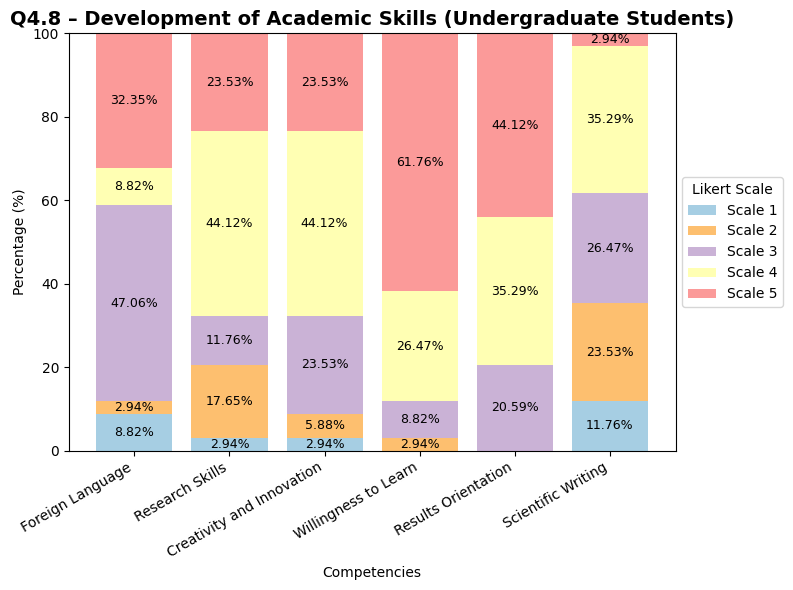

In [ ]:
perfil_graduacao = df[df.iloc[:, 6].str.strip() == 'Graduação'].copy()
perfil_graduacao

lingua_estrangeira_gra = perfil_graduacao.iloc[:,76]
habilidade_pesquisa_gra = perfil_graduacao.iloc[:,77]
criatividade_inovacao_gra = perfil_graduacao.iloc[:,78]
vontade_aprender_gra = perfil_graduacao.iloc[:,79]
orientacao_resultado_gra = perfil_graduacao.iloc[:,80]
escrita_cientifica_gra = perfil_graduacao.iloc[:,81]

lingua_counts_gra = lingua_estrangeira_gra.value_counts().reindex(range(1, 6), fill_value=0)
pesquisa_counts_gra = habilidade_pesquisa_gra.value_counts().reindex(range(1, 6), fill_value=0)
criatividade_counts_gra = criatividade_inovacao_gra.value_counts().reindex(range(1, 6), fill_value=0)
vontade_counts_gra = vontade_aprender_gra.value_counts().reindex(range(1, 6), fill_value=0)
resultado_counts_gra = orientacao_resultado_gra.value_counts().reindex(range(1, 6), fill_value=0)
escrita_counts_gra = escrita_cientifica_gra.value_counts().reindex(range(1, 6), fill_value=0)

data_gra = pd.DataFrame({
    'Foreign Language': lingua_counts_gra,
    'Research Skills': pesquisa_counts_gra,
    'Creativity and Innovation': criatividade_counts_gra,
    'Willingness to Learn': vontade_counts_gra,
    'Results Orientation': resultado_counts_gra,
    'Scientific Writing': escrita_counts_gra
}, index=escala_likert)

# Calcular percentual
data_percent = data_gra.div(data_gra.sum(axis=0), axis=1) * 100

# --- Plot vertical empilhado ---
fig, ax = plt.subplots(figsize=(8,6))
competencias = data_percent.columns
bottom = np.zeros(len(competencias))
count = 0
for i, nivel in enumerate(escala_likert):
    values = data_percent.loc[nivel].values
    bars = ax.bar(competencias, values, bottom=bottom, color=colors[i], label=f'Scale {nivel}')

    # Adiciona rótulos com diferentes posições]
    for j, val in enumerate(values):

        if val >= 2:  # dentro da barra
            ax.text(
                j, bottom[j] + val/2, f'{val:.2f}%', ha='center', va='center', fontsize=9
            )
        elif val > 0 and val < 2:  # <2%, lateral da barra
            count+=1
            if count == 1:
              ax.text(
                  j + 0.05, bottom[j] + val/2, f'{val:.2f}%', ha='left', va='center', fontsize=8
              )
            else:

              ax.text(
                j - 0.05,  # pequeno deslocamento para a esquerda da barra
                bottom[j] + val/2,
                f'{val:.2f}%',
                ha='right',  # alinhado à direita
                va='center',
                fontsize=8
            )

    bottom += values

# Configurações finais
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Competencies')
ax.set_title('Q4.8 – Development of Academic Skills (Undergraduate Students)', fontsize=14, fontweight='bold')
ax.set_ylim(0, 100)
plt.xticks(rotation=30, ha='right')

# Legenda fora do gráfico
ax.legend(title='Likert Scale', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.tight_layout()
plt.show()



### Q4.8 Graduated

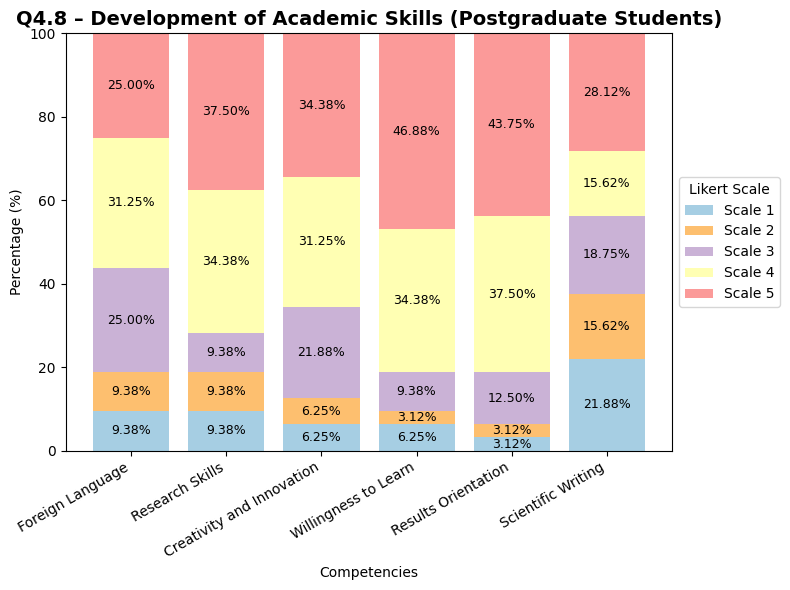

In [ ]:
perfil_pos_graduacao = df[df.iloc[:, 6].str.strip() == 'Pós-graduação'].copy()
perfil_pos_graduacao

lingua_estrangeira = perfil_pos_graduacao.iloc[:,76]
habilidade_pesquisa = perfil_pos_graduacao.iloc[:,77]
criatividade_inovacao = perfil_pos_graduacao.iloc[:,78]
vontade_aprender = perfil_pos_graduacao.iloc[:,79]
orientacao_resultado = perfil_pos_graduacao.iloc[:,80]
escrita_cientifica = perfil_pos_graduacao.iloc[:,81]

lingua_counts = lingua_estrangeira.value_counts().reindex(range(1, 6), fill_value=0)
pesquisa_counts = habilidade_pesquisa.value_counts().reindex(range(1, 6), fill_value=0)
criatividade_counts = criatividade_inovacao.value_counts().reindex(range(1, 6), fill_value=0)
vontade_counts = vontade_aprender.value_counts().reindex(range(1, 6), fill_value=0)
resultado_counts = orientacao_resultado.value_counts().reindex(range(1, 6), fill_value=0)
escrita_counts = escrita_cientifica.value_counts().reindex(range(1, 6), fill_value=0)

data = pd.DataFrame({
    'Foreign Language': lingua_counts,
    'Research Skills': pesquisa_counts,
    'Creativity and Innovation': criatividade_counts,
    'Willingness to Learn': vontade_counts,
    'Results Orientation': resultado_counts,
    'Scientific Writing': escrita_counts
}, index=escala_likert)

# Calcular percentual
data_percent = data.div(data.sum(axis=0), axis=1) * 100

# --- Plot vertical empilhado ---
fig, ax = plt.subplots(figsize=(8,6))
competencias = data_percent.columns
bottom = np.zeros(len(competencias))
count = 0
for i, nivel in enumerate(escala_likert):
    values = data_percent.loc[nivel].values
    bars = ax.bar(competencias, values, bottom=bottom, color=colors[i], label=f'Scale {nivel}')

    # Adiciona rótulos com diferentes posições]
    for j, val in enumerate(values):

        if val >= 2:  # dentro da barra
            ax.text(
                j, bottom[j] + val/2, f'{val:.2f}%', ha='center', va='center', fontsize=9
            )
        elif val > 0 and val < 2:  # <2%, lateral da barra
            count+=1
            if count == 1:
              ax.text(
                  j + 0.05, bottom[j] + val/2, f'{val:.2f}%', ha='left', va='center', fontsize=8
              )
            else:

              ax.text(
                j - 0.05,  # pequeno deslocamento para a esquerda da barra
                bottom[j] + val/2,
                f'{val:.2f}%',
                ha='right',  # alinhado à direita
                va='center',
                fontsize=8
            )

    bottom += values

# Configurações finais
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Competencies')
ax.set_title('Q4.8 – Development of Academic Skills (Postgraduate Students)', fontsize=14, fontweight='bold')
ax.set_ylim(0, 100)
plt.xticks(rotation=30, ha='right')

# Legenda fora do gráfico
ax.legend(title='Likert Scale', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.tight_layout()
plt.show()



### Q4.8 Undergraduate and Postgraduate

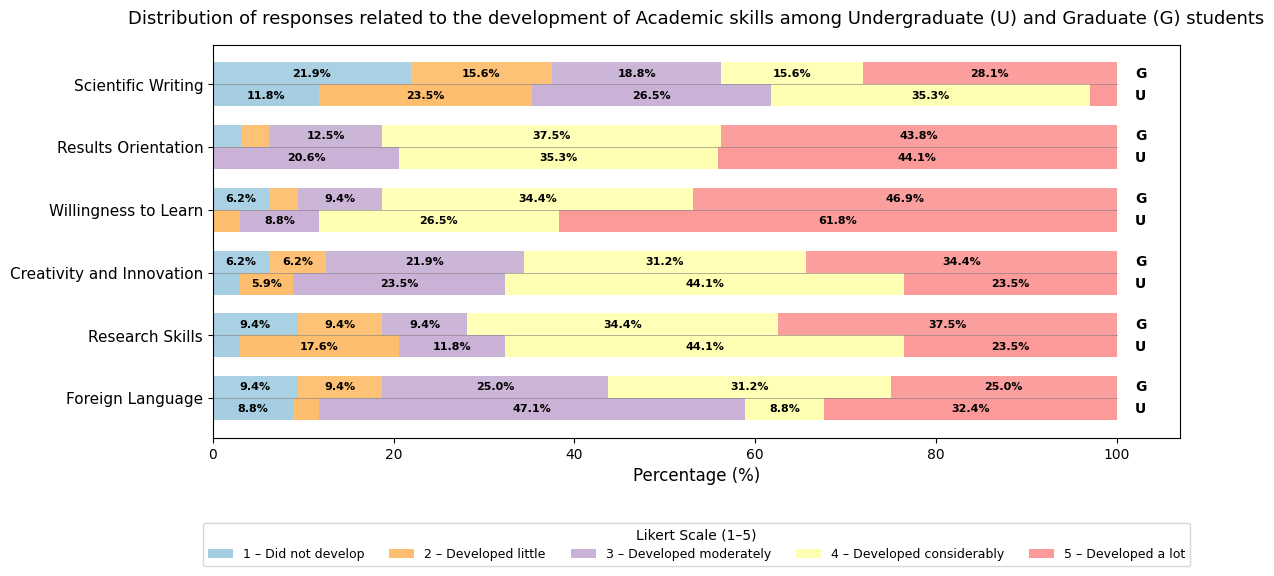

In [ ]:

escala_likert = [1, 2, 3, 4, 5]

perfil_graduacao = df[df.iloc[:, 6].str.strip() == 'Graduação'].copy()

lingua_estrangeira_gra = perfil_graduacao.iloc[:,76]
habilidade_pesquisa_gra = perfil_graduacao.iloc[:,77]
criatividade_inovacao_gra = perfil_graduacao.iloc[:,78]
vontade_aprender_gra = perfil_graduacao.iloc[:,79]
orientacao_resultado_gra = perfil_graduacao.iloc[:,80]
escrita_cientifica_gra = perfil_graduacao.iloc[:,81]

lingua_counts_gra = lingua_estrangeira_gra.value_counts().reindex(range(1, 6), fill_value=0)
pesquisa_counts_gra = habilidade_pesquisa_gra.value_counts().reindex(range(1, 6), fill_value=0)
criatividade_counts_gra = criatividade_inovacao_gra.value_counts().reindex(range(1, 6), fill_value=0)
vontade_counts_gra = vontade_aprender_gra.value_counts().reindex(range(1, 6), fill_value=0)
resultado_counts_gra = orientacao_resultado_gra.value_counts().reindex(range(1, 6), fill_value=0)
escrita_counts_gra = escrita_cientifica_gra.value_counts().reindex(range(1, 6), fill_value=0)

data_gra = pd.DataFrame({
    'Foreign Language': lingua_counts_gra,
    'Research Skills': pesquisa_counts_gra,
    'Creativity and Innovation': criatividade_counts_gra,
    'Willingness to Learn': vontade_counts_gra,
    'Results Orientation': resultado_counts_gra,
    'Scientific Writing': escrita_counts_gra
}, index=escala_likert)

data_percent_gra = data_gra.div(data_gra.sum(axis=0), axis=1) * 100

perfil_pos_graduacao = df[df.iloc[:, 6].str.strip() == 'Pós-graduação'].copy()

lingua_estrangeira = perfil_pos_graduacao.iloc[:,76]
habilidade_pesquisa = perfil_pos_graduacao.iloc[:,77]
criatividade_inovacao = perfil_pos_graduacao.iloc[:,78]
vontade_aprender = perfil_pos_graduacao.iloc[:,79]
orientacao_resultado = perfil_pos_graduacao.iloc[:,80]
escrita_cientifica = perfil_pos_graduacao.iloc[:,81]

lingua_counts = lingua_estrangeira.value_counts().reindex(range(1, 6), fill_value=0)
pesquisa_counts = habilidade_pesquisa.value_counts().reindex(range(1, 6), fill_value=0)
criatividade_counts = criatividade_inovacao.value_counts().reindex(range(1, 6), fill_value=0)
vontade_counts = vontade_aprender.value_counts().reindex(range(1, 6), fill_value=0)
resultado_counts = orientacao_resultado.value_counts().reindex(range(1, 6), fill_value=0)
escrita_counts = escrita_cientifica.value_counts().reindex(range(1, 6), fill_value=0)

data = pd.DataFrame({
    'Foreign Language': lingua_counts,
    'Research Skills': pesquisa_counts,
    'Creativity and Innovation': criatividade_counts,
    'Willingness to Learn': vontade_counts,
    'Results Orientation': resultado_counts,
    'Scientific Writing': escrita_counts
}, index=escala_likert)

data_percent = data.div(data.sum(axis=0), axis=1) * 100

categories = data.columns.tolist()
undergrad = data_percent_gra.T.values.tolist()
postgrad = data_percent.T.values.tolist()

colors_ug = ['#A6CEE3', '#FDBF6F', '#CAB2D6', '#FFFFB3', '#FB9A99']
colors_pg = ['#A6CEE3', '#FDBF6F', '#CAB2D6', '#FFFFB3', '#FB9A99']

# Likert scale descriptions in English
likert_labels_en = [
    "1 – Did not develop",
    "2 – Developed little",
    "3 – Developed moderately",
    "4 – Developed considerably",
    "5 – Developed a lot"
]

y = np.arange(len(categories))
height = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(right=1)

# --- Undergraduate (U) bars ---
left = np.zeros(len(categories))
for i in range(5):
    values = np.array([u[i] for u in undergrad])
    bars = ax.barh(y - height/2, values, left=left, height=height, color=colors_ug[i])
    for j, bar in enumerate(bars):
        if values[j] > 3:
            ax.text(left[j] + values[j]/2, bar.get_y() + bar.get_height()/2,
                    f"{values[j]:.1f}%", ha='center', va='center',
                    color='black', fontsize=8, fontweight='bold')
    left += values
totals_undergrad = left.copy()

# --- Postgraduate (P) bars ---
left = np.zeros(len(categories))
for i in range(5):
    values = np.array([p[i] for p in postgrad])
    bars = ax.barh(y + height/2, values, left=left, height=height, color=colors_pg[i], alpha=0.95)
    for j, bar in enumerate(bars):
        if values[j] > 5:
            ax.text(left[j] + values[j]/2, bar.get_y() + bar.get_height()/2,
                    f"{values[j]:.1f}%", ha='center', va='center',
                    color='black', fontsize=8, fontweight='bold')
    left += values
totals_postgrad = left.copy()

# --- Thin line between Undergraduate and Postgraduate bars ---
for i, cat_y in enumerate(y):
    ax.plot([0, 100], [cat_y, cat_y], color='gray', linewidth=0.6, alpha=0.7, linestyle='-')

# --- Limits and U/P markers ---
max_total = max(totals_undergrad.max(), totals_postgrad.max())
ax.set_xlim(0, max_total + 7)

offset = max(1.0, max_total * 0.02)
for idx in range(len(categories)):
    ax.text(totals_undergrad[idx] + offset, y[idx] - height/2,
            "U", va='center', ha='left', fontsize=10, fontweight='bold')
    ax.text(totals_postgrad[idx] + offset, y[idx] + height/2,
            "G", va='center', ha='left', fontsize=10, fontweight='bold')

# --- Labels and title ---
ax.set_yticks(y)
ax.set_yticklabels(categories, fontsize=11)
ax.set_xlabel("Percentage (%)", fontsize=12)
ax.set_title("Distribution of responses related to the development of Academic skills among Undergraduate (U) and Graduate (G) students",
             fontsize=13, pad=15)

# --- Legend (in English) with U/P explanation ---
patches = [Patch(facecolor=colors_ug[i]) for i in range(5)]
ax.legend(
    handles=patches,
    labels=likert_labels_en,
    title="Likert Scale (1–5)",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.20),
    ncol=5,
    fontsize=9,
    title_fontsize=10,
    frameon=True
)

plt.tight_layout()
plt.show()